# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Appalling service with fai...
1,✅ Trip Verified | British Airways charge you f...
2,✅ Trip Verified | What is wrong with you guys?...
3,✅ Trip Verified | We booked two business cla...
4,✅ Trip Verified | I’ve flown with many airline...


In [8]:
df.to_csv("C:\\Users\\rajma\\OneDrive\\Desktop\\Data\\BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [15]:
df['reviews'] = df['reviews'].str.split('|', n=1).str[1].str.strip()

In [16]:
df

,reviews
0,Appalling service with failing defective fleet...
1,British Airways charge you for the pleasure of...
2,What is wrong with you guys? People pay lots o...
3,We booked two business class seat with British...
4,"I’ve flown with many airlines, but my recent e..."
...,...
995,Grenada to Gatwick. Having flown with BA on th...
996,Prague to London. A two hour flight on 27th Ju...
997,London to Dubai. Lately I am frequently flying...
998,Tel Aviv to Toronto via London. The plane from...


<b>Removed All Non-Alphanumeric Characters</b>

Used a regex pattern to keep only letters, numbers and spaces if the text included any special characters.

In [17]:
df['reviews'] = df['reviews'].str.replace(r"[^a-zA-Z0-9\s]", "", regex=True).str.strip()

<b>Removed Leading/Trailing Whitespace</b>

Cleaned up leading or trailing spaces.

In [18]:
df['reviews'] = df['reviews'].str.strip()

<b>Removed Extra Whitespace Between Words</b>

Normalized multiple spaces into a single space.

In [19]:
df['reviews'] = df['reviews'].str.replace(r'\s+', ' ', regex=True).str.strip()

<h3>Cleaned Dataframe</h3>

In [20]:
df

,reviews
0,Appalling service with failing defective fleet...
1,British Airways charge you for the pleasure of...
2,What is wrong with you guys People pay lots of...
3,We booked two business class seat with British...
4,Ive flown with many airlines but my recent exp...
...,...
995,Grenada to Gatwick Having flown with BA on thi...
996,Prague to London A two hour flight on 27th Jul...
997,London to Dubai Lately I am frequently flying ...
998,Tel Aviv to Toronto via London The plane from ...


## Sentiment Analysis

Now we employ two powerful sentiment analysis techniques: TextBlob and Transformers. Each method offers unique strengths for assessing the emotional tone of the reviews. By leveraging these tools, we aim to gain deeper insights into public sentiment surrounding the British Airways. This multi-faceted approach enhances the robustness of our analysis and provides a comprehensive understanding of the sentiment expressed in the reviews.


### TextBlob Sentiment Analysis

For sentiment analysis, the TextBlob library was employed to evaluate the sentiment of the reviews. A function was created to determine the sentiment polarity of each review, yielding a score ranging from -1 (indicating negative sentiment) to 1 (indicating positive sentiment). This approach facilitated an effective assessment of the emotional tone present in the reviews.


In [26]:
from textblob import TextBlob

# TextBlob Sentiment Analysis
def get_textblob_sentiment(reviews):
    blob = TextBlob(reviews)
    return blob.sentiment.polarity  # Returns sentiment polarity (-1 to 1)

df['textblob_sentiment'] = df['reviews'].apply(get_textblob_sentiment)

df[['reviews', 'textblob_sentiment']]

,reviews,textblob_sentiment
0,Appalling service with failing defective fleet...,0.006250
1,British Airways charge you for the pleasure of...,0.165332
2,What is wrong with you guys People pay lots of...,-0.052083
3,We booked two business class seat with British...,-0.255556
4,Ive flown with many airlines but my recent exp...,0.019805
...,...,...
995,Grenada to Gatwick Having flown with BA on thi...,0.094122
996,Prague to London A two hour flight on 27th Jul...,0.158333
997,London to Dubai Lately I am frequently flying ...,0.234375
998,Tel Aviv to Toronto via London The plane from ...,0.367857


### Transformers Sentiment Analysis

For a comprehensive analysis of sentiments, the Transformers library was employed, utilizing a pre-trained model for sentiment analysis. A function was created to evaluate the sentiment of each review, producing a label of either 'POSITIVE' or 'NEGATIVE' along with a confidence score. This approach leverages advanced deep learning models to provide accurate and context-aware sentiment evaluations, further enriching the analysis of the reviews collected.


In [27]:
from transformers import pipeline

# Initialize the transformer sentiment analyzer
transformer_analyzer = pipeline("sentiment-analysis")

# Function to get sentiment, handling text truncation
def get_transformer_sentiment(reviews):
    # Truncate reviews to 512 characters to fit model input size
    truncated_review = reviews[:512]
    result = transformer_analyzer(truncated_review)[0]
    return result['label'], result['score']  # Returns label and confidence score

# Apply the function to each review in the DataFrame
df['transformer_sentiment'] = df['reviews'].apply(lambda reviews: get_transformer_sentiment(reviews)[0])
df['transformer_confidence'] = df['reviews'].apply(lambda reviews: get_transformer_sentiment(reviews)[1])

df[['reviews', 'transformer_sentiment', 'transformer_confidence']]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\rajma\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,reviews,transformer_sentiment,transformer_confidence
0,Appalling service with failing defective fleet...,NEGATIVE,0.999372
1,British Airways charge you for the pleasure of...,NEGATIVE,0.998137
2,What is wrong with you guys People pay lots of...,NEGATIVE,0.999704
3,We booked two business class seat with British...,NEGATIVE,0.998812
4,Ive flown with many airlines but my recent exp...,NEGATIVE,0.999657
...,...,...,...
995,Grenada to Gatwick Having flown with BA on thi...,POSITIVE,0.998915
996,Prague to London A two hour flight on 27th Jul...,NEGATIVE,0.999601
997,London to Dubai Lately I am frequently flying ...,POSITIVE,0.997137
998,Tel Aviv to Toronto via London The plane from ...,POSITIVE,0.751008


## Cleaned Data

In [29]:
df = df[['reviews', 'transformer_sentiment', 'transformer_confidence', 'textblob_sentiment']]
df

,reviews,transformer_sentiment,transformer_confidence,textblob_sentiment
0,Appalling service with failing defective fleet...,NEGATIVE,0.999372,0.006250
1,British Airways charge you for the pleasure of...,NEGATIVE,0.998137,0.165332
2,What is wrong with you guys People pay lots of...,NEGATIVE,0.999704,-0.052083
3,We booked two business class seat with British...,NEGATIVE,0.998812,-0.255556
4,Ive flown with many airlines but my recent exp...,NEGATIVE,0.999657,0.019805
...,...,...,...,...
995,Grenada to Gatwick Having flown with BA on thi...,POSITIVE,0.998915,0.094122
996,Prague to London A two hour flight on 27th Jul...,NEGATIVE,0.999601,0.158333
997,London to Dubai Lately I am frequently flying ...,POSITIVE,0.997137,0.234375
998,Tel Aviv to Toronto via London The plane from ...,POSITIVE,0.751008,0.367857


## Total number of Positive and Negative reviews.

In [65]:
# Count the total number of POSITIVE and NEGATIVE sentiments
sentiment_counts = df['transformer_sentiment'].value_counts()

# Print only the specific sentiments if they exist in the result
if 'POSITIVE' in sentiment_counts:
    print(f"POSITIVE: {sentiment_counts['POSITIVE']}")

if 'NEGATIVE' in sentiment_counts:
    print(f"NEGATIVE: {sentiment_counts['NEGATIVE']}")


POSITIVE: 220
NEGATIVE: 780


## Data Visualization using Matplotlib and Seaborn

<b>Bar Plot for Sentiment Counts

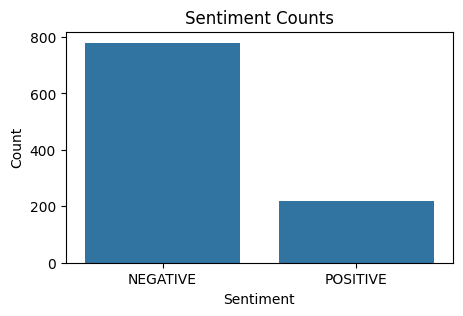

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for transformer_sentiment
plt.figure(figsize=(5, 3))
sns.countplot(x='transformer_sentiment', data=df)
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<b>Distribution of Transformer Confidence Scores

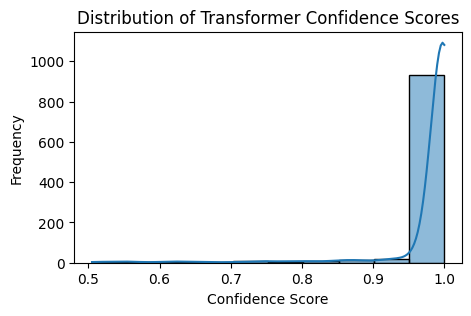

In [52]:
# Distribution plot for transformer_confidence
plt.figure(figsize=(5, 3))
sns.histplot(df['transformer_confidence'], bins=10, kde=True)
plt.title('Distribution of Transformer Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

<b>Transformer Confidence vs TextBlob Sentiment

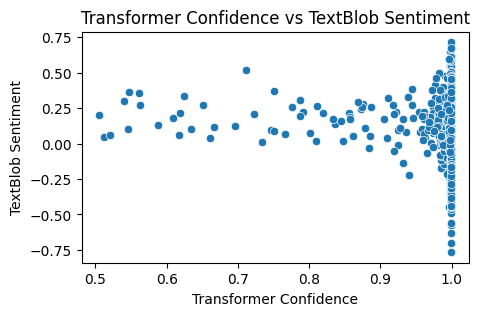

In [51]:
# Scatter plot comparing transformer_confidence with textblob_sentiment
plt.figure(figsize=(5, 3))
sns.scatterplot(x='transformer_confidence', y='textblob_sentiment', data=df)
plt.title('Transformer Confidence vs TextBlob Sentiment')
plt.xlabel('Transformer Confidence')
plt.ylabel('TextBlob Sentiment')
plt.show()

<b>Confidence Scores by Sentiment

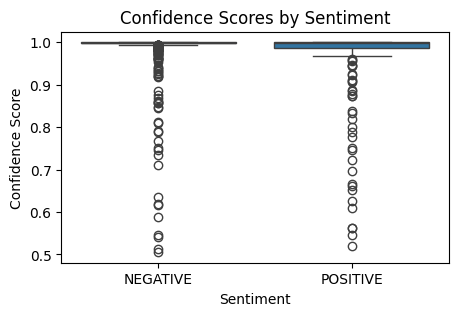

In [50]:
# Box plot for transformer confidence by sentiment
plt.figure(figsize=(5, 3))
sns.boxplot(x='transformer_sentiment', y='transformer_confidence', data=df)
plt.title('Confidence Scores by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Confidence Score')
plt.show()

<b>Joint Plot: Transformer Confidence vs TextBlob Sentiment

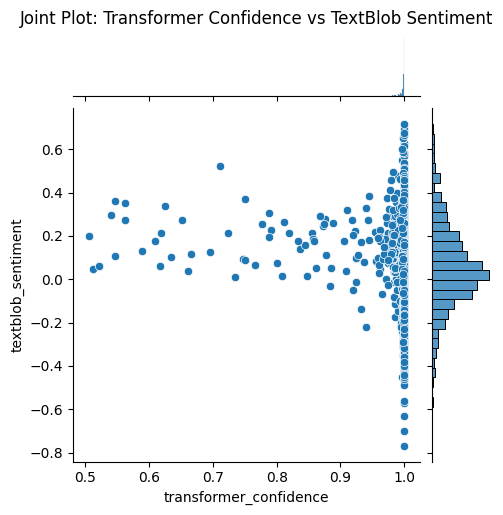

In [58]:
# Joint plot for transformer_confidence and textblob_sentiment
sns.jointplot(x='transformer_confidence', y='textblob_sentiment', data=df, kind='scatter', height=5)
plt.suptitle('Joint Plot: Transformer Confidence vs TextBlob Sentiment', y=1.02)
plt.show()

<b>Sentiment Comparison

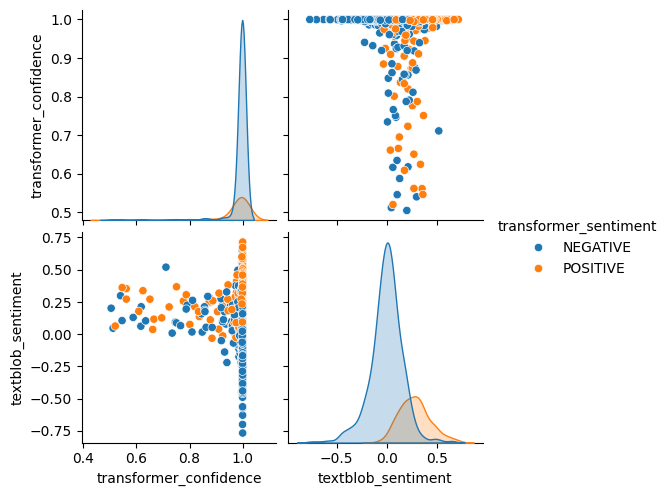

In [61]:
sns.pairplot(df, hue='transformer_sentiment');

<b> Conclusion</b>

The analysis of British Airways reviews indicates a varied range of customer sentiments. A significant portion of the feedback is classified as NEGATIVE, with common themes including service challenges, delays, and management responsiveness. Conversely, there are also POSITIVE sentiments expressed by some customers, highlighting satisfactory experiences. This mixed feedback suggests that while there are areas for improvement, there are also positive aspects of the service that can be built upon.